# Monte Carlo simulation of AAPL and compare with actual data


### Geometric Brownian motion SDE

$\frac{ds}{s} = \mu dt + \sigma dW_{t}$

where $W_{t}$ is a Wiener process or Brownian motion, and $\mu$ ('the percentage drift') and $\sigma$ ('the percentage volatility') are constants.



### import data using yfinance

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import yfinance as yf


In [2]:
aapl = yf.Ticker('AAPL')
actual_hist = aapl.history(start = '2017-12-29',end = '2019-12-30', auto_adjust= False)

# check the first and last rows
print(actual_hist.iloc[[0,-1]])

                                Open       High        Low      Close  \
Date                                                                    
2017-12-29 00:00:00-05:00  42.630001  42.647499  42.305000  42.307499   
2019-12-27 00:00:00-05:00  72.779999  73.492500  72.029999  72.449997   

                           Adj Close     Volume  Dividends  Stock Splits  
Date                                                                      
2017-12-29 00:00:00-05:00  39.901466  103999600        0.0           0.0  
2019-12-27 00:00:00-05:00  70.397667  146266000        0.0           0.0  


lenght of close price is: 502


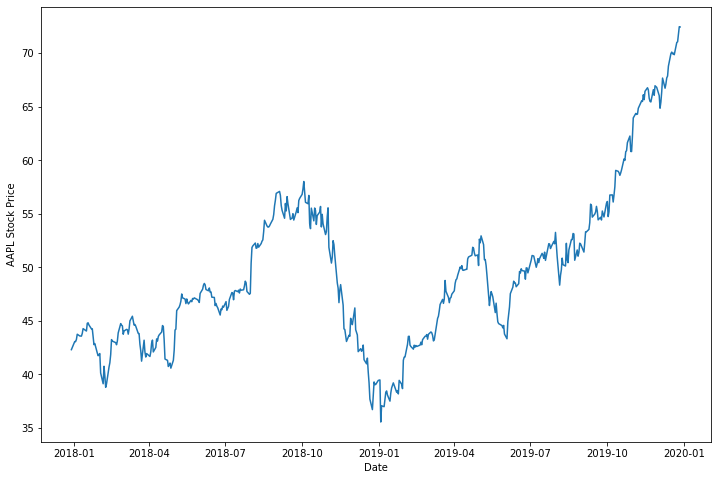

In [3]:
print('lenght of close price is:',len(actual_hist['Close']))
fig = plt.figure(figsize=(12, 8))
plt.plot(actual_hist['Close'])
plt.xlabel('Date')
plt.ylabel('AAPL Stock Price');

# MC Simulation

In [4]:
# How many steps(days), stepsize is 1 day
n_t = len(actual_hist)

# How many paths/ realizations
n_mc = 10000

#initialize with zeros each colum is one MC simulation with legth of data
St = pd.DataFrame(0., index = actual_hist.index, columns = list(range(1,n_mc+1)))
St.iloc[0] = actual_hist['Close'].iloc[0] # step 0

print('Shape of data frame: ', St.shape)
St.head()

Shape of data frame:  (502, 10000)


,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-29 00:00:00-05:00,42.307499,42.307499,42.307499,42.307499,42.307499,42.307499,42.307499,42.307499,42.307499,42.307499,...,42.307499,42.307499,42.307499,42.307499,42.307499,42.307499,42.307499,42.307499,42.307499,42.307499
2018-01-02 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-03 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-04 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-05 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [22]:
sigma = .25

mu = .08

# 2 years
dt = 2./(n_t - 1)
print('number of days:', n_t)
print('step size', dt)
print('')
print('Daily Vol:' , sigma * np.sqrt(dt))

number of days: 502
step size 0.003992015968063872

Daily Vol: 0.015795600590164084


In [23]:
for i in range(1,n_t):
    # usign the fact that dW = dt^.5
    ds_to_s = mu*dt + sigma * np.sqrt(dt) * np.random.randn(n_mc)
    St.iloc[i] = St.iloc[i-1] + St.iloc[i-1] * ds_to_s

In [24]:
St.head()

,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-29 00:00:00-05:00,42.307499,42.307499,42.307499,42.307499,42.307499,42.307499,42.307499,42.307499,42.307499,42.307499,...,42.307499,42.307499,42.307499,42.307499,42.307499,42.307499,42.307499,42.307499,42.307499,42.307499
2018-01-02 00:00:00-05:00,42.563793,43.699743,42.875033,43.275644,43.417307,41.976022,43.092804,42.700963,43.137168,41.629691,...,42.064417,42.691646,42.137336,42.032153,41.826500,42.646868,41.780969,43.130532,41.731697,41.919156
2018-01-03 00:00:00-05:00,42.729449,44.895999,44.376408,42.664710,42.800019,40.706534,43.387088,42.570050,43.785891,40.746203,...,42.531233,42.951706,42.650467,41.549235,41.221792,42.606085,42.398260,43.032447,42.943301,41.286227
2018-01-04 00:00:00-05:00,42.938829,46.137531,44.824234,42.826229,42.289266,41.100206,42.408635,42.313500,42.970931,41.869115,...,42.002510,43.344980,43.096674,41.474075,41.593569,42.505796,42.835295,42.834451,43.390062,42.024110
2018-01-05 00:00:00-05:00,43.163731,46.659484,45.185691,42.990797,43.223132,41.426455,42.227016,41.641364,41.806358,41.574013,...,43.119993,42.789932,43.182661,40.901087,40.954940,42.631716,42.763802,43.161893,43.876613,41.678720


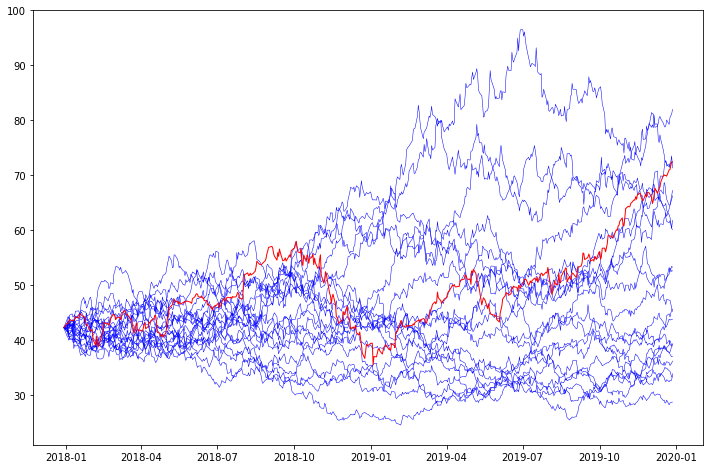

In [41]:
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(111)

for i in np.random.choice(np.array(range(1,n_mc+1)), size = 20):
    ax1.plot(St[i], 'b', lw = .5)

ax1.plot(actual_hist['Close'], 'r', lw = 1)

# Comapre with theoretical expectations from SDE

$ E[S_{t}] = S_{0} e^{\mu t}$

$ Median = S_{0} e^{\mu t - \frac{1}{2} \sigma^{2} t} $

In [42]:
St_mc_mean = St.mean(axis = 1) # mean of every row
St_mc_mean

Date
2017-12-29 00:00:00-05:00    42.307499
2018-01-02 00:00:00-05:00    42.324927
2018-01-03 00:00:00-05:00    42.333606
2018-01-04 00:00:00-05:00    42.350633
2018-01-05 00:00:00-05:00    42.362457
                               ...    
2019-12-20 00:00:00-05:00    49.540003
2019-12-23 00:00:00-05:00    49.561879
2019-12-24 00:00:00-05:00    49.582024
2019-12-26 00:00:00-05:00    49.611229
2019-12-27 00:00:00-05:00    49.629746
Length: 502, dtype: float64

In [43]:
St_mc_var = St.var(axis = 1) # 
St_mc_var

Date
2017-12-29 00:00:00-05:00      0.000000
2018-01-02 00:00:00-05:00      0.449788
2018-01-03 00:00:00-05:00      0.895285
2018-01-04 00:00:00-05:00      1.336189
2018-01-05 00:00:00-05:00      1.778109
                                ...    
2019-12-20 00:00:00-05:00    319.143329
2019-12-23 00:00:00-05:00    320.497944
2019-12-24 00:00:00-05:00    321.972372
2019-12-26 00:00:00-05:00    323.136018
2019-12-27 00:00:00-05:00    323.860206
Length: 502, dtype: float64

In [44]:
St_th_mean = actual_hist['Close'].iloc[0]* np.exp(mu * (np.arange(n_t)/n_t*2.))
St_th_mean = pd.DataFrame(St_th_mean, index=St_mc_mean.index)
St_th_mean

,0
Date,
2017-12-29 00:00:00-05:00,42.307499
2018-01-02 00:00:00-05:00,42.320986
2018-01-03 00:00:00-05:00,42.334476
2018-01-04 00:00:00-05:00,42.347972
2018-01-05 00:00:00-05:00,42.361471
...,...
2019-12-20 00:00:00-05:00,49.569252
2019-12-23 00:00:00-05:00,49.585054
2019-12-24 00:00:00-05:00,49.600860


In [45]:
print('E of MC:', St_mc_mean.iloc[-1]);
print('Theory of E:', St_th_mean.iloc[-1]);

E of MC: 49.62974626331392
Theory of E: 0    49.632488
Name: 2019-12-27 00:00:00-05:00, dtype: float64


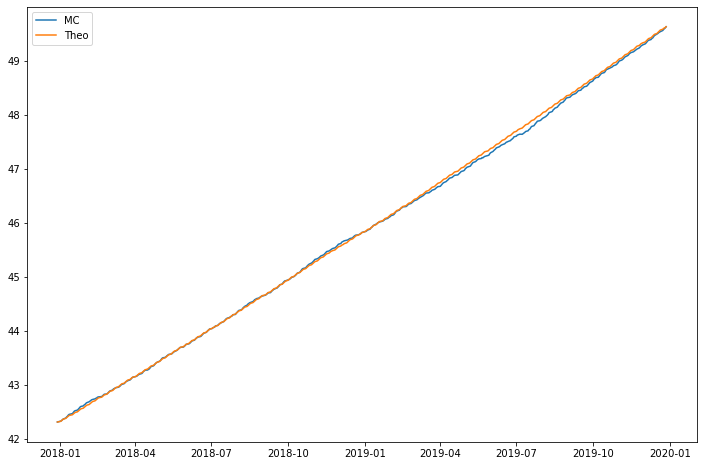

In [46]:
fig = plt.figure(figsize=(12, 8))


plt.plot(St_mc_mean, label = 'MC')
plt.plot(St_th_mean, label = 'Theo')
plt.legend()

In [47]:
St_mc_median = St.median(axis = 1) # mean of every row

St_th_median = actual_hist['Close'].iloc[0]* np.exp((mu-.5*sigma * sigma) * np.arange(n_t)/n_t*2.)
St_th_median = pd.DataFrame(St_th_median, index=St_mc_mean.index)
print('E of MC:', St_mc_median.iloc[-1])
print('Theory of E:', St_th_median.iloc[-1])

E of MC: 46.68055624890894
Theory of E: 0    46.631213
Name: 2019-12-27 00:00:00-05:00, dtype: float64


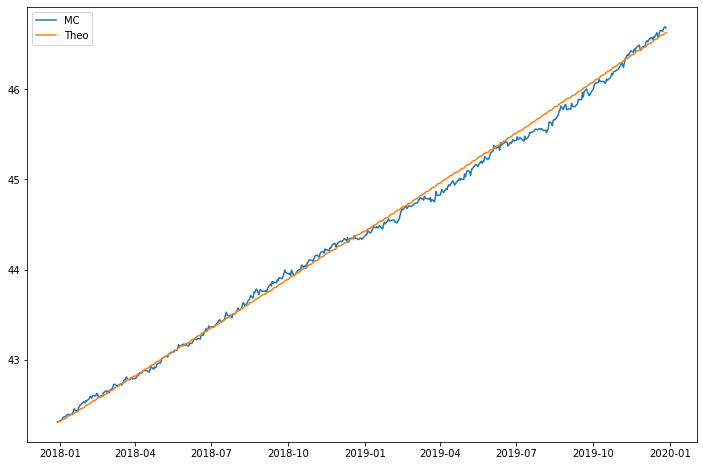

In [48]:
fig = plt.figure(figsize=(12, 8))


plt.plot(St_mc_median, label = 'MC')
plt.plot(St_th_median, label = 'Theo')
plt.legend()

In [38]:
print('E of MC:', St_mc_median.iloc[-1]);
print('Theory of E:', St_th_median.iloc[-1]);

E of MC: 46.40076838595896
Theory of E: 0    46.631213
Name: 2019-12-27 00:00:00-05:00, dtype: float64


# Define the function for MC

In [39]:
def generate_gbm_mc(actual_hist, n_mc, mu = .08, sigma = .25):
    n_t = len(actual_hist)
    St = pd.DataFrame(0., index = actual_hist.index, columns = list(range(1,n_mc+1)))
    St.iloc[0] = actual_hist['Close'].iloc[0] # step 0
    dt = 2./(n_t - 1)
    for i in range(1,n_t):
        # usign the fact that dW = dt^.5
        ds_to_s = mu*dt + sigma * np.sqrt(dt) * np.random.randn(n_mc)
        St.iloc[i] = St.iloc[i-1] + St.iloc[i-1] * ds_to_s
    
    return St 

In [40]:
St = generate_gbm_mc(actual_hist,n_mc = 20000 )